<a href="https://colab.research.google.com/github/Nanangk/Deep_Autoencoder_Implementation_with_Keras/blob/master/Deep_Autoencoder_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Autoencoder Implementation

This project aim to implementation of Deep Autoencoder with Keras, this project use fashion mnist dataset from keras

Fashion mnist is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. 

The class labels are:

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot 

<h3>What is Autoencoder?</h3>
Autoencoder is one of type neural network where the input is same as the output, autoencoder learn the input data and reconstruct the input data, autoencoder used for dimensionality reduction

![Autoencoder](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRj6teOvotqH0V03TJsL5avWnHWSUBFlJUJIgSjrdff2dz3ca5C&usqp=CAU)

In [41]:
#import library
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense
from keras.models import Model

In [42]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [43]:
#Rescale  dataset
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [44]:
#Build Autoencoder Model

target_dimension = 16

#Encoder
input_img = Input(shape=(784,))
encoder = Dense(128, activation='relu')(input_img)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)

#code
coded = Dense(target_dimension, activation='relu')(encoder)

#Decoder
decoder = Dense(32, activation='relu')(coded)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(784, activation='sigmoid')(decoder)

autoencoder = Model(input_img, decoder)

In [45]:
#compile model
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

In [46]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_50 (Dense)             (None, 64)                2112

In [47]:
#Training model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3584 - val_loss: 0.3161
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3090 - val_loss: 0.3079
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3027 - val_loss: 0.3023
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2986 - val_loss: 0.2993
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2956 - val_loss: 0.2966
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2934 - val_loss: 0.2942
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2912 - val_loss: 0.2925
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2896 - val_loss: 0.2909
Epoch 9/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2882 - val_loss: 0.2900
Epoch

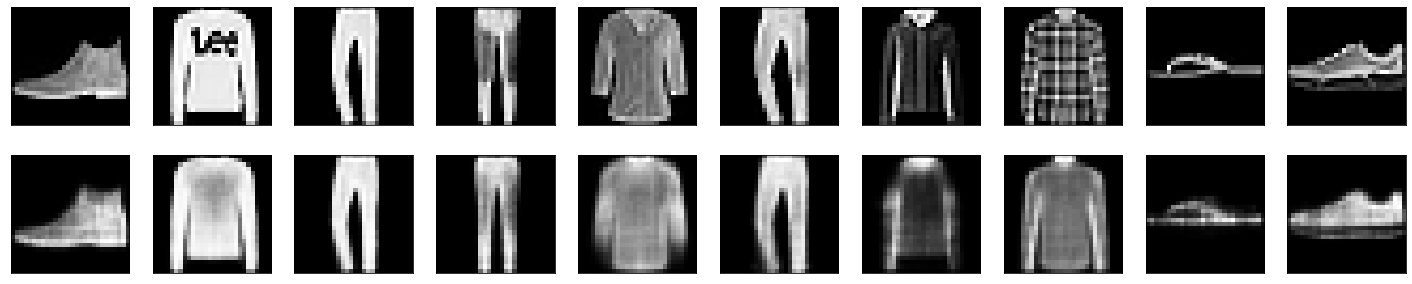

In [48]:
#Display original data and reconstruction data
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(25, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Build Classifier Model

In [49]:
#impoert library
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

In [50]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [51]:
#Build CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='linear', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [52]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [61]:
x_test[0].shape

(28, 28, 1)

In [60]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [62]:
#Train model without autoencoder image
model_without_autoencoder = model.fit(x_train, y_train, 
          batch_size=64, 
          epochs=10, 
          verbose=1,
          validation_data=(x_test, y_test)
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.4422 - accuracy: 0.8478 - val_loss: 0.4012 - val_accuracy: 0.8553
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.3187 - accuracy: 0.8888 - val_loss: 0.3235 - val_accuracy: 0.8845
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.2859 - accuracy: 0.8986 - val_loss: 0.3047 - val_accuracy: 0.8911
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.2684 - accuracy: 0.9048 - val_loss: 0.2854 - val_accuracy: 0.8984
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.2526 - accuracy: 0.9099 - val_loss: 0.3415 - val_accuracy: 0.8837
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.2417 - accuracy: 0.9143 - val_loss: 0.2982 - val_accuracy: 0.8939
Epoch 7/10
60000/60000 [==============================] 

In [65]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


decoded_train_imgs = autoencoder.predict(x_train)
decoded_test_imgs = autoencoder.predict(x_test)

In [66]:
decoded_train_imgs = np.reshape(decoded_train_imgs, (len(decoded_train_imgs), 28, 28, 1)) 
decoded_test_imgs = np.reshape(decoded_test_imgs, (len(decoded_test_imgs), 28, 28, 1))

In [67]:
#Train model witht autoencoder image
model_with_autoencoder = model.fit(decoded_train_imgs, y_train, 
          batch_size=64, 
          epochs=10, 
          verbose=1,
          validation_data=(decoded_test_imgs, y_test)
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.4509 - accuracy: 0.8357 - val_loss: 0.4430 - val_accuracy: 0.8383
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.4184 - accuracy: 0.8469 - val_loss: 0.4294 - val_accuracy: 0.8411
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.4049 - accuracy: 0.8512 - val_loss: 0.4271 - val_accuracy: 0.8421
Epoch 4/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.3954 - accuracy: 0.8542 - val_loss: 0.4320 - val_accuracy: 0.8414
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.3882 - accuracy: 0.8557 - val_loss: 0.4351 - val_accuracy: 0.8405
Epoch 6/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.3828 - accuracy: 0.8575 - val_loss: 0.4128 - val_accuracy: 0.8500
Epoch 7/10
60000/60000 [==============================] 

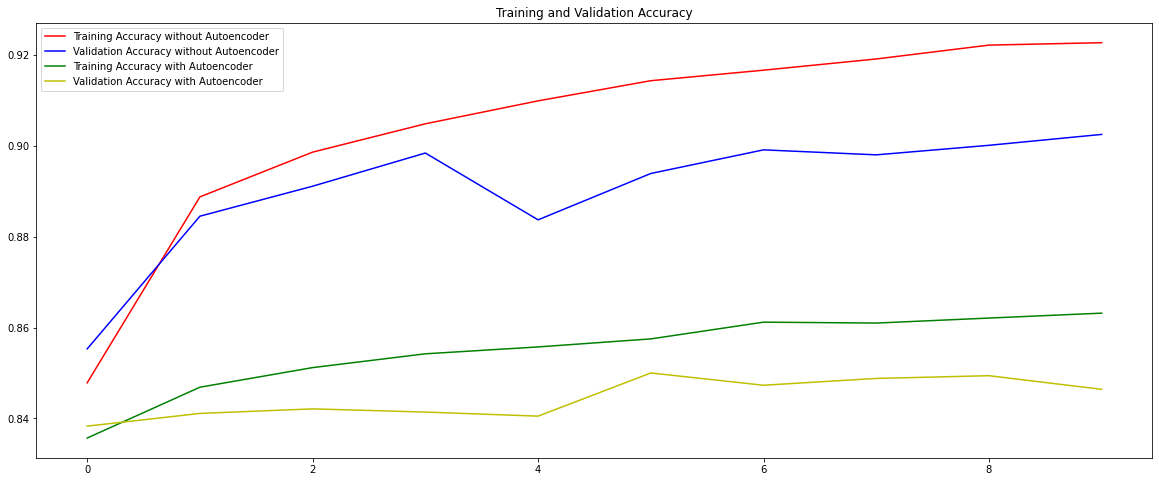

<Figure size 432x288 with 0 Axes>

In [68]:
#accuracy visualization

import matplotlib.pyplot as plt

acc = model_without_autoencoder.history['accuracy']
val_acc = model_without_autoencoder.history['val_accuracy']

acc2 = model_with_autoencoder.history['accuracy']
val_acc2 = model_with_autoencoder.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, acc, 'r', label='Training Accuracy without Autoencoder')
ax.plot(epochs, val_acc, 'b', label='Validation Accuracy without Autoencoder')
ax.plot(epochs, acc2, 'g', label='Training Accuracy with Autoencoder')
ax.plot(epochs, val_acc2, 'y', label='Validation Accuracy with Autoencoder')
ax.set_title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()